In [1]:
import pandas as pd

# --- Load France dataset (Banque de France) ---
france = pd.read_csv(
    "France-10year-government-yield.csv",   # adjust file name if needed
    sep=';',                                # Banque de France uses ';'
    encoding='utf-8'
)

# --- Clean France dataset ---
france.columns = france.columns.str.strip()
france = france.rename(columns={
    france.columns[0]: "Date",
    france.columns[1]: "France_10y"
})

france["Date"] = pd.to_datetime(france["Date"], format="%Y-%m-%d", errors="coerce")
france["France_10y"] = pd.to_numeric(france["France_10y"], errors="coerce")
france = france.ffill()  # fill weekends/holidays
france = france.dropna(subset=["Date"]).reset_index(drop=True)

france.head()


,Date,France_10y
0,2025-10-24,3.42
1,2025-10-23,3.36
2,2025-10-22,3.33
3,2025-10-21,3.34
4,2025-10-20,3.38


In [2]:
import pandas as pd

# --- Load Germany dataset (Bundesbank format, semicolon-separated) ---
germany = pd.read_csv(
    "Germany-10year-government-yield.csv",
    sep=';',               # << important!
    encoding='utf-8',
    skiprows=5             # often Bundesbank files have header metadata (adjust if needed)
)

# --- Drop unnecessary or empty columns ---
germany = germany.loc[:, ~germany.columns.str.contains("Unnamed")]

print("Columns before rename:", germany.columns.tolist())

# --- Keep only the first two relevant columns (Date + Yield) ---
germany = germany.iloc[:, :2]

# --- Rename columns ---
germany.columns = ["Date", "Germany_10y"]

# --- Convert formats ---
germany["Date"] = pd.to_datetime(germany["Date"], format="%Y-%m-%d", errors="coerce")
germany["Germany_10y"] = pd.to_numeric(germany["Germany_10y"], errors="coerce")

# --- Fill and clean ---
germany = germany.ffill().dropna(subset=["Date"]).reset_index(drop=True)

# --- Verify ---
print(germany.head())
print(germany.info())



Columns before rename: ['category', 'ZRWR']
        Date  Germany_10y
0 2014-12-29         0.57
1 2014-12-30         0.56
2 2014-12-31         0.56
3 2015-01-01         0.56
4 2015-01-02         0.54
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3953 entries, 0 to 3952
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3953 non-null   datetime64[ns]
 1   Germany_10y  3953 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 61.9 KB
None


In [3]:
# --- Load Belgium dataset (NBB) ---
belgium = pd.read_csv(
    "Belgium-10year-government-yield.csv",
    sep=';',
    encoding='utf-8',
    skiprows=6   # skip metadata
)

# Rename columns
belgium.columns = ["Maturity", "Date", "Belgium_10y"]
belgium = belgium[["Date", "Belgium_10y"]]

# Convert and clean
belgium["Date"] = pd.to_datetime(belgium["Date"], format="%Y-%m-%d", errors="coerce")
belgium["Belgium_10y"] = pd.to_numeric(belgium["Belgium_10y"], errors="coerce")
belgium = belgium.ffill()
belgium = belgium.dropna(subset=["Date"]).reset_index(drop=True)

belgium.head()


,Date,Belgium_10y
0,2015-01-07,0.92
1,2015-01-08,0.95
2,2015-01-09,0.93
3,2015-01-12,0.90
4,2015-01-13,0.87


In [4]:
import pandas as pd

# --- Load Italy dataset (Banca d’Italia Excel file) ---
italy = pd.read_excel(
    "Italy-10year-government-yield.xlsx",
    skiprows=5,
    decimal=",",     # <--- important for European number formats
)


# --- Drop any unnecessary or unnamed columns ---
italy = italy.loc[:, ~italy.columns.str.contains("Unnamed", case=False, na=False)]

# --- Keep only the first two columns (Date + Yield) ---
italy = italy.iloc[:, :2]

# --- Rename columns for clarity ---
italy.columns = ["Date", "Italy_10y"]

# --- Convert Date and Yield formats ---
italy["Date"] = pd.to_datetime(italy["Date"], errors="coerce")
italy["Italy_10y"] = pd.to_numeric(italy["Italy_10y"], errors="coerce")

# --- Fill missing weekends/holidays and drop invalid rows ---
italy = italy.ffill().dropna(subset=["Date"]).reset_index(drop=True)

# --- Verify ---
print(italy.head())
print(italy.info())



        Date  Italy_10y
0 2025-09-25    3.60148
1 2025-09-24    3.58419
2 2025-09-23    3.56279
3 2025-09-22    3.56038
4 2025-09-21    3.56038
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3924 non-null   datetime64[ns]
 1   Italy_10y  3924 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 61.4 KB
None


In [5]:
# --- Load Spain Excel file ---
spain = pd.read_excel(
    "Spain-10year-government-yield.xlsx",
    skiprows=6  # skip metadata
)

# Rename columns manually
spain.columns = ["Date", "Spain_10y"]

# Replace Spanish month abbreviations with English
spain["Date"] = spain["Date"].replace({
    "ENE": "JAN", "FEB": "FEB", "MAR": "MAR", "ABR": "APR", "MAY": "MAY", "JUN": "JUN",
    "JUL": "JUL", "AGO": "AUG", "SEP": "SEP", "OCT": "OCT", "NOV": "NOV", "DIC": "DEC"
}, regex=True)

# Convert to datetime (Spanish format: day–month–year)
spain["Date"] = pd.to_datetime(spain["Date"], format="%d %b %Y", errors="coerce")

# Convert yield column to numeric
spain["Spain_10y"] = pd.to_numeric(spain["Spain_10y"], errors="coerce")

# Fill missing values
spain = spain.ffill().dropna(subset=["Date"]).reset_index(drop=True)

spain.head()


,Date,Spain_10y
0,2015-01-01,NaN
1,2015-01-02,1.540
2,2015-01-05,1.541
3,2015-01-06,1.582
4,2015-01-07,1.628


In [6]:
# --- Descriptive statistics for all countries ---

summary_stats = pd.DataFrame({
    "France": france["France_10y"].describe(),
    "Germany": germany["Germany_10y"].describe(),
    "Belgium": belgium["Belgium_10y"].describe(),
    "Italy": italy["Italy_10y"].describe(),
    "Spain": spain["Spain_10y"].describe()
})

# Display neatly
print(summary_stats)


            France      Germany       Belgium        Italy        Spain
count  3952.000000  3953.000000  11579.000000  3924.000000  2822.000000
mean      1.215752     0.795330      1.718159     2.390687     1.753149
std       1.250694     1.116668      1.415676     1.187309     1.119565
min      -0.417000    -0.830000     -0.510000     0.438120    -0.011000
25%       0.194750    -0.100000      0.520000     1.407435     0.896750
50%       0.759000     0.400000      1.410000     2.096855     1.534500
75%       2.760000     2.170000      3.000000     3.550560     3.036000
max       3.620000     2.970000      5.840000     5.033480     4.052000


In [7]:
# --- Align Belgium start date to match others ---
start_date = pd.to_datetime("2014-12-29")
belgium_aligned = belgium[belgium["Date"] >= start_date].reset_index(drop=True)

# --- Compute descriptive statistics for all countries (aligned period) ---
summary_stats_aligned = pd.DataFrame({
    "France": france["France_10y"].describe(),
    "Germany": germany["Germany_10y"].describe(),
    "Belgium": belgium_aligned["Belgium_10y"].describe(),
    "Italy": italy["Italy_10y"].describe(),
    "Spain": spain["Spain_10y"].describe()
})

# --- Display neatly ---
print("Descriptive Statistics (Aligned Start Date ≈ 2014-12-29)\n")
print(summary_stats_aligned)

# --- Optional: export to Excel for record keeping ---
summary_stats_aligned.to_excel("Descriptive_Stats_Yields_Aligned.xlsx", index=True)


Descriptive Statistics (Aligned Start Date ≈ 2014-12-29)

            France      Germany      Belgium        Italy        Spain
count  3952.000000  3953.000000  8109.000000  3924.000000  2822.000000
mean      1.215752     0.795330     1.188143     2.390687     1.753149
std       1.250694     1.116668     1.235262     1.187309     1.119565
min      -0.417000    -0.830000    -0.510000     0.438120    -0.011000
25%       0.194750    -0.100000     0.180000     1.407435     0.896750
50%       0.759000     0.400000     0.730000     2.096855     1.534500
75%       2.760000     2.170000     2.730000     3.550560     3.036000
max       3.620000     2.970000     3.640000     5.033480     4.052000


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Align Belgium to start near 2014-12-29 ---
start_date = pd.to_datetime("2014-12-29")
belgium_aligned = belgium[belgium["Date"] >= start_date].reset_index(drop=True)

# --- Merge all datasets on Date (outer join to keep all trading days) ---
merged = (
    france.merge(germany, on="Date", how="outer")
          .merge(belgium_aligned, on="Date", how="outer")
          .merge(italy, on="Date", how="outer")
          .merge(spain, on="Date", how="outer")
          .sort_values("Date")
          .ffill()  # fill missing weekends/holidays
          .reset_index(drop=True)
)

# --- Restrict merged dataset to common date range (start from 2014-12-29) ---
merged = merged[merged["Date"] >= start_date].reset_index(drop=True)

# --- Verify ---
print(merged.info())
print(merged.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9360 non-null   datetime64[ns]
 1   France_10y   9358 non-null   float64       
 2   Germany_10y  9360 non-null   float64       
 3   Belgium_10y  9360 non-null   float64       
 4   Italy_10y    9360 non-null   float64       
 5   Spain_10y    9353 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 438.9 KB
None
        Date  France_10y  Germany_10y  Belgium_10y  Italy_10y  Spain_10y
0 2014-12-29         NaN         0.57         0.93    1.99915        NaN
1 2014-12-29         NaN         0.57         0.88    1.99915        NaN
2 2014-12-30       0.858         0.56         0.91    1.91757        NaN
3 2014-12-30       0.858         0.56         0.85    1.91757        NaN
4 2014-12-31       0.858         0.56         0.91    1.79528        Na

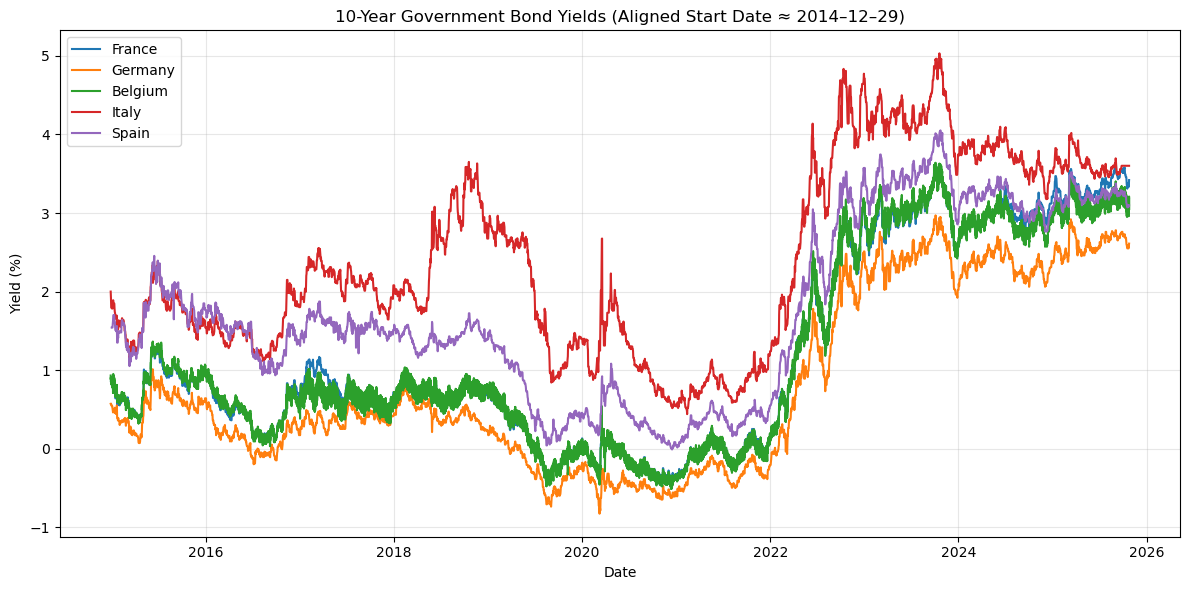

In [9]:
# --- Plot all countries ---
plt.figure(figsize=(12, 6))
plt.plot(merged["Date"], merged["France_10y"], label="France")
plt.plot(merged["Date"], merged["Germany_10y"], label="Germany")
plt.plot(merged["Date"], merged["Belgium_10y"], label="Belgium")
plt.plot(merged["Date"], merged["Italy_10y"], label="Italy")
plt.plot(merged["Date"], merged["Spain_10y"], label="Spain")

plt.title("10-Year Government Bond Yields (Aligned Start Date ≈ 2014–12–29)")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import numpy as np

# === Correct files directly in working directory ===
files = {
    "Portugal": "Portugal-10year-government-yield.csv",
    "Ireland": "Ireland-10year-government-yield.csv",
    "Greece": "Greece-10year-government-yield.csv"  # ✅ use this one now
}

# === Helper function to clean Investing.com yield CSVs ===
def load_investing_csv(path, country):
    df = pd.read_csv(path)
    df.columns = [c.strip() for c in df.columns]

    # Find Date and Yield columns
    date_col = [c for c in df.columns if "Date" in c][0]
    ycol_candidates = [c for c in df.columns if "Price" in c or "Yield" in c]
    ycol = ycol_candidates[0]

    # Parse and clean
    df["Date"] = pd.to_datetime(df[date_col], errors="coerce")
    df[ycol] = (
        df[ycol]
        .astype(str)
        .str.replace(",", "")
        .str.replace("%", "")
        .astype(float)
    )

    df = df[["Date", ycol]].rename(columns={ycol: f"{country}_10y"}).sort_values("Date")
    df = df.drop_duplicates(subset="Date", keep="last").reset_index(drop=True)
    return df

# === Load and clean all three ===
portugal = load_investing_csv(files["Portugal"], "Portugal")
ireland = load_investing_csv(files["Ireland"], "Ireland")
greece = load_investing_csv(files["Greece"], "Greece")

# ✅ Inspect individually
print("Portugal:")
display(portugal.head())

print("Ireland:")
display(ireland.head())

print("Greece:")
display(greece.head())



Portugal:


,Date,Portugal_10y
0,2015-01-02,2.444
1,2015-01-03,2.454
2,2015-01-05,2.543
3,2015-01-06,2.567
4,2015-01-07,2.723


Ireland:


,Date,Ireland_10y
0,2015-01-02,1.168
1,2015-01-03,1.173
2,2015-01-05,1.217
3,2015-01-06,1.195
4,2015-01-07,1.247


Greece:


,Date,Greece_10y
0,2015-01-02,9.256
1,2015-01-03,9.284
2,2015-01-05,9.532
3,2015-01-06,9.809
4,2015-01-07,10.656


In [28]:
# === Merge additional countries with the main merged dataset ===
merged_ext = (
    merged
    .merge(portugal, on="Date", how="outer")
    .merge(ireland, on="Date", how="outer")
    .merge(greece, on="Date", how="outer")
    .sort_values("Date")
    .ffill()        # fill weekends/holidays with previous values
    .reset_index(drop=True)
)

# === Align start date (same as before) ===
merged_ext = merged_ext[merged_ext["Date"] >= "2014-12-29"].reset_index(drop=True)

print("✅ Merged dataset shape:", merged_ext.shape)
print(merged_ext.head())


✅ Merged dataset shape: (9365, 9)
        Date  France_10y  Germany_10y  Belgium_10y  Italy_10y  Spain_10y  \
0 2014-12-29         NaN         0.57         0.93    1.99915        NaN   
1 2014-12-29         NaN         0.57         0.88    1.99915        NaN   
2 2014-12-30       0.858         0.56         0.91    1.91757        NaN   
3 2014-12-30       0.858         0.56         0.85    1.91757        NaN   
4 2014-12-31       0.858         0.56         0.91    1.79528        NaN   

   Portugal_10y  Ireland_10y  Greece_10y  
0           NaN          NaN         NaN  
1           NaN          NaN         NaN  
2           NaN          NaN         NaN  
3           NaN          NaN         NaN  
4           NaN          NaN         NaN  


In [30]:
merged_ext.to_csv("Euro10Y_Merged_Extended.csv", index=False)
print("✅ Saved extended dataset as Euro10Y_Merged_Extended.csv")


✅ Saved extended dataset as Euro10Y_Merged_Extended.csv


In [32]:
import pandas as pd

# === Select only the yield columns ===
yield_cols = [c for c in merged_ext.columns if c.endswith("_10y")]

# === Compute descriptive statistics ===
summary_stats = merged_ext[yield_cols].describe().T  # Transpose for readability

# Add a count of missing observations
summary_stats["missing"] = merged_ext[yield_cols].isna().sum()
summary_stats["obs"] = merged_ext[yield_cols].count()

# Round for clarity
summary_stats = summary_stats.round(3)

# === Display ===
print("Descriptive Statistics for 10-Year Government Bond Yields (2014–2025):")
display(summary_stats)


Descriptive Statistics for 10-Year Government Bond Yields (2014–2025):


,count,mean,std,min,25%,50%,75%,max,missing,obs
France_10y,9363.0,1.218,1.253,-0.417,0.193,0.759,2.760,3.620,2,9363
Germany_10y,9365.0,0.798,1.119,-0.830,-0.100,0.400,2.170,2.970,0,9365
Belgium_10y,9365.0,1.193,1.235,-0.510,0.180,0.730,2.740,3.640,0,9365
Italy_10y,9365.0,2.400,1.189,0.438,1.409,2.106,3.572,5.033,0,9365
Spain_10y,9358.0,1.754,1.121,-0.011,0.897,1.534,3.041,4.052,7,9358
Portugal_10y,9358.0,2.113,1.179,-0.052,1.032,2.498,3.081,4.238,7,9358
Ireland_10y,9358.0,1.277,1.089,-0.320,0.403,0.941,2.575,3.377,7,9358
Greece_10y,9358.0,4.346,2.857,0.533,2.591,3.757,5.491,19.442,7,9358


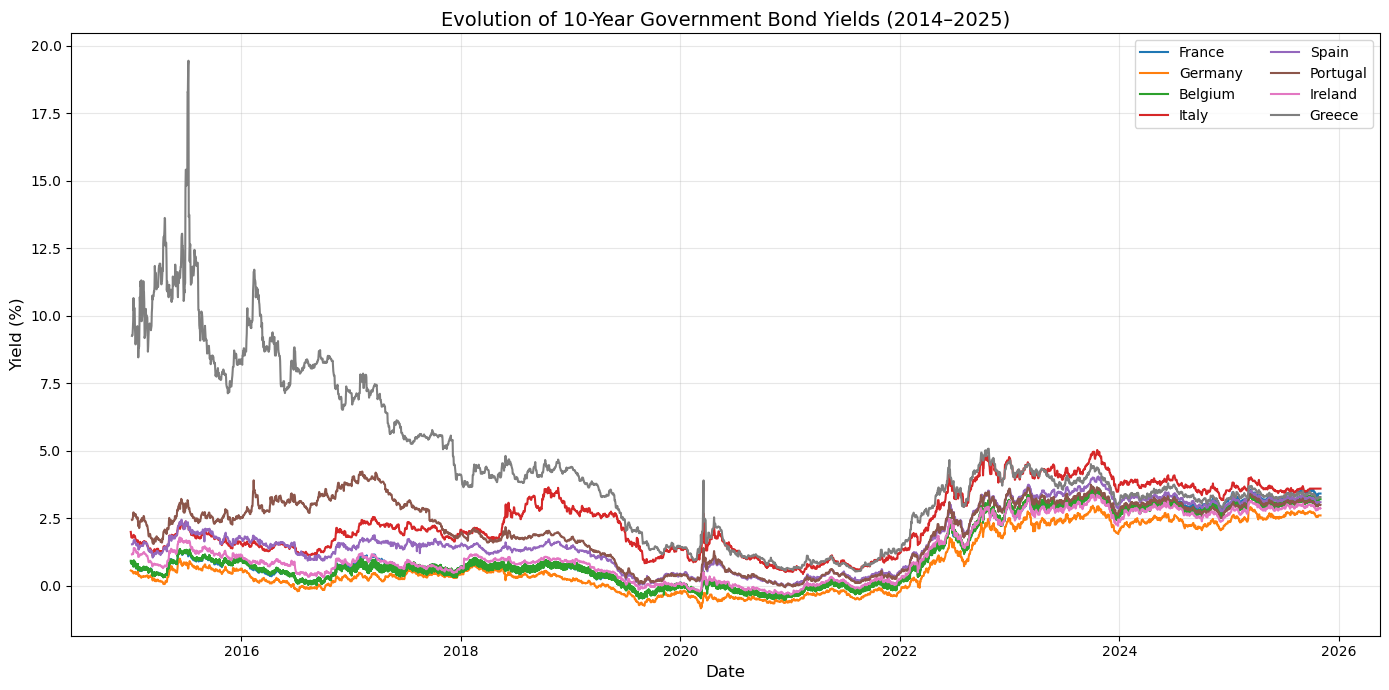

In [34]:
import matplotlib.pyplot as plt

# === Identify yield columns ===
yield_cols = [c for c in merged_ext.columns if c.endswith("_10y")]

# === Plot ===
plt.figure(figsize=(14, 7))

for col in yield_cols:
    plt.plot(merged_ext["Date"], merged_ext[col], label=col.replace("_10y", ""))

plt.title("Evolution of 10-Year Government Bond Yields (2014–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Yield (%)", fontsize=12)
plt.legend(loc="upper right", ncol=2, fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


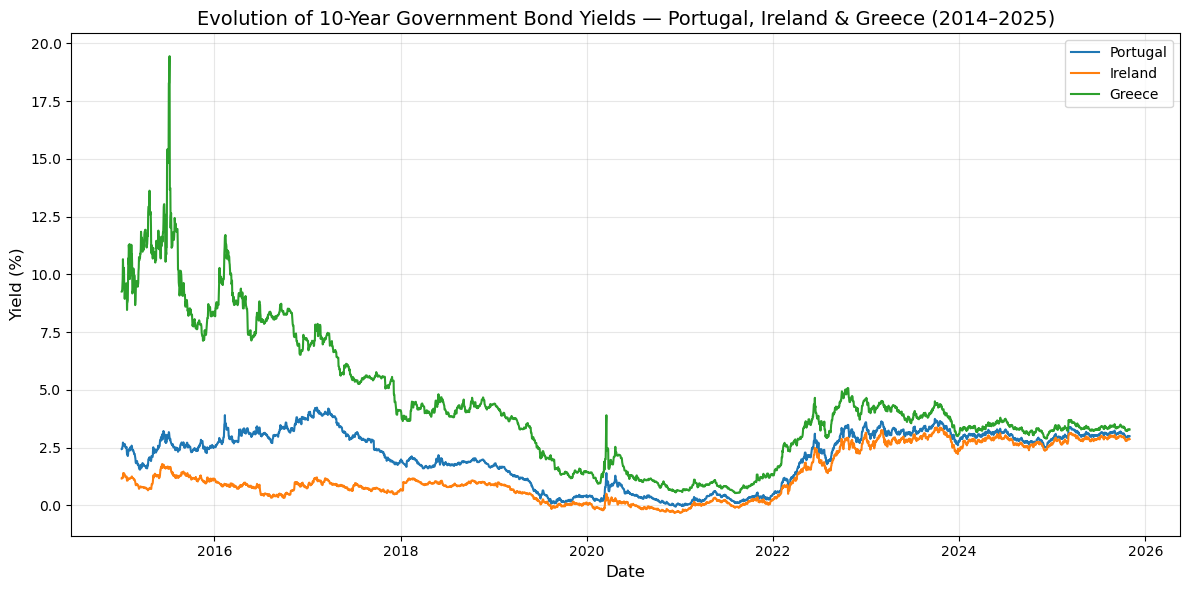

In [38]:
import matplotlib.pyplot as plt

# === Select only the newly added countries ===
new_countries = ["Portugal_10y", "Ireland_10y", "Greece_10y"]

plt.figure(figsize=(12, 6))

for col in new_countries:
    plt.plot(merged_ext["Date"], merged_ext[col], label=col.replace("_10y", ""))

plt.title("Evolution of 10-Year Government Bond Yields — Portugal, Ireland & Greece (2014–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Yield (%)", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd

# Identify yield columns except Germany
yield_cols = [c for c in merged_ext.columns if c.endswith("_10y") and c != "Germany_10y"]

# Compute spreads: Spread_i,t = y_i,t - y_DE,t
for col in yield_cols:
    country = col.replace("_10y", "")
    merged_ext[f"{country}_spread"] = merged_ext[col] - merged_ext["Germany_10y"]

# Preview new columns
spread_cols = [c for c in merged_ext.columns if c.endswith("_spread")]
print("✅ Spread columns created:", spread_cols[:5], "…")
merged_ext[["Date"] + spread_cols].head()


✅ Spread columns created: ['France_spread', 'Belgium_spread', 'Italy_spread', 'Spain_spread', 'Portugal_spread'] …


,Date,France_spread,Belgium_spread,Italy_spread,Spain_spread,Portugal_spread,Ireland_spread,Greece_spread
0,2014-12-29,NaN,0.36,1.42915,NaN,NaN,NaN,NaN
1,2014-12-29,NaN,0.31,1.42915,NaN,NaN,NaN,NaN
2,2014-12-30,0.298,0.35,1.35757,NaN,NaN,NaN,NaN
3,2014-12-30,0.298,0.29,1.35757,NaN,NaN,NaN,NaN
4,2014-12-31,0.298,0.35,1.23528,NaN,NaN,NaN,NaN


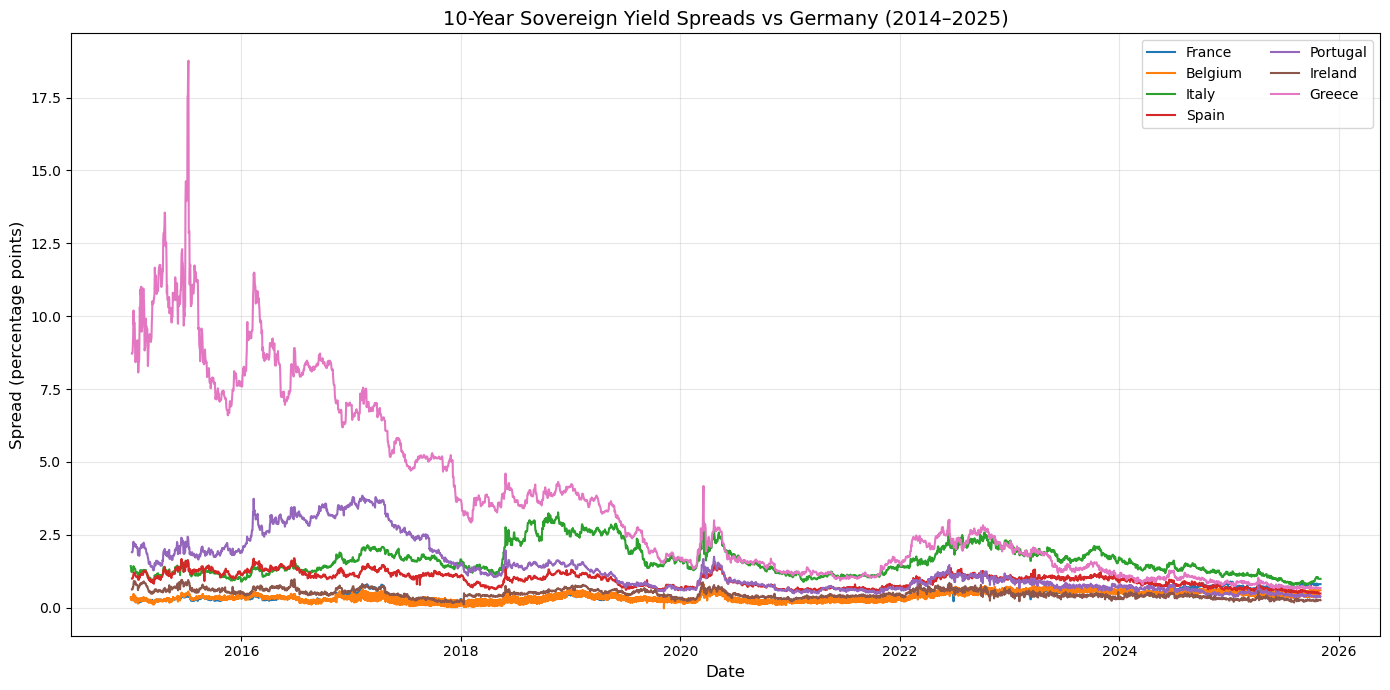

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

for col in spread_cols:
    plt.plot(merged_ext["Date"], merged_ext[col], label=col.replace("_spread", ""))

plt.title("10-Year Sovereign Yield Spreads vs Germany (2014–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Spread (percentage points)", fontsize=12)
plt.legend(loc="upper right", ncol=2, fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


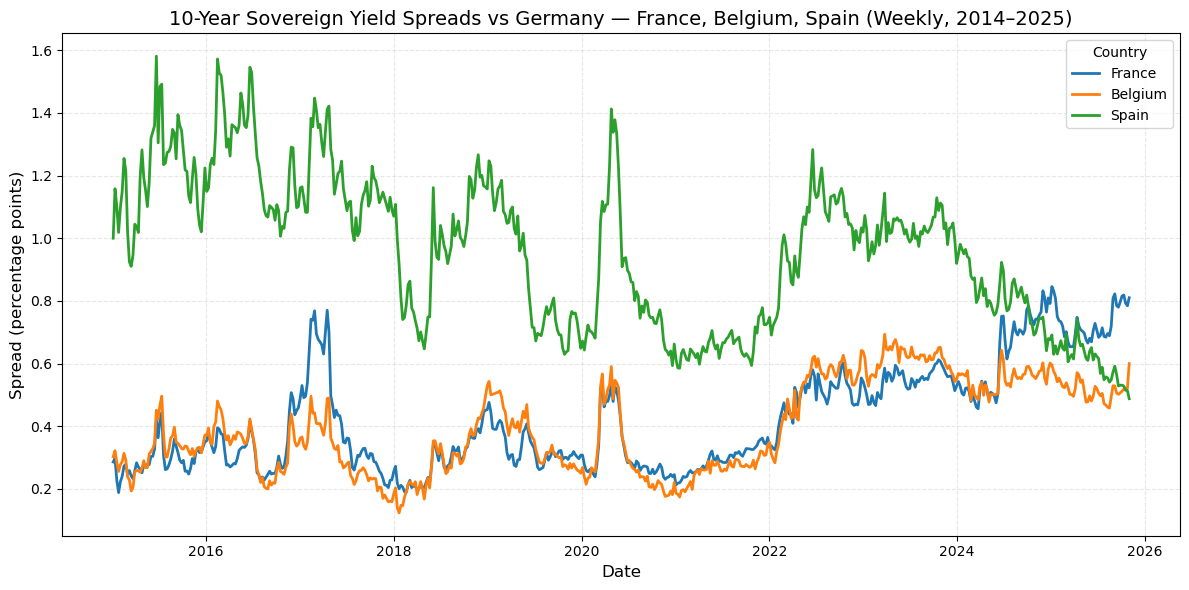

In [48]:
import matplotlib.pyplot as plt

# === Select the spreads you want ===
core_spreads = ["France_spread", "Belgium_spread", "Spain_spread"]

# === Smooth by taking weekly mean ===
smoothed = (
    merged_ext[["Date"] + core_spreads]
    .set_index("Date")
    .resample("W")  # weekly
    .mean()
)

# === Plot ===
plt.figure(figsize=(12, 6))
for col in core_spreads:
    plt.plot(smoothed.index, smoothed[col], label=col.replace("_spread", ""), linewidth=2)

plt.title("10-Year Sovereign Yield Spreads vs Germany — France, Belgium, Spain (Weekly, 2014–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Spread (percentage points)", fontsize=12)
plt.legend(title="Country", fontsize=10)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


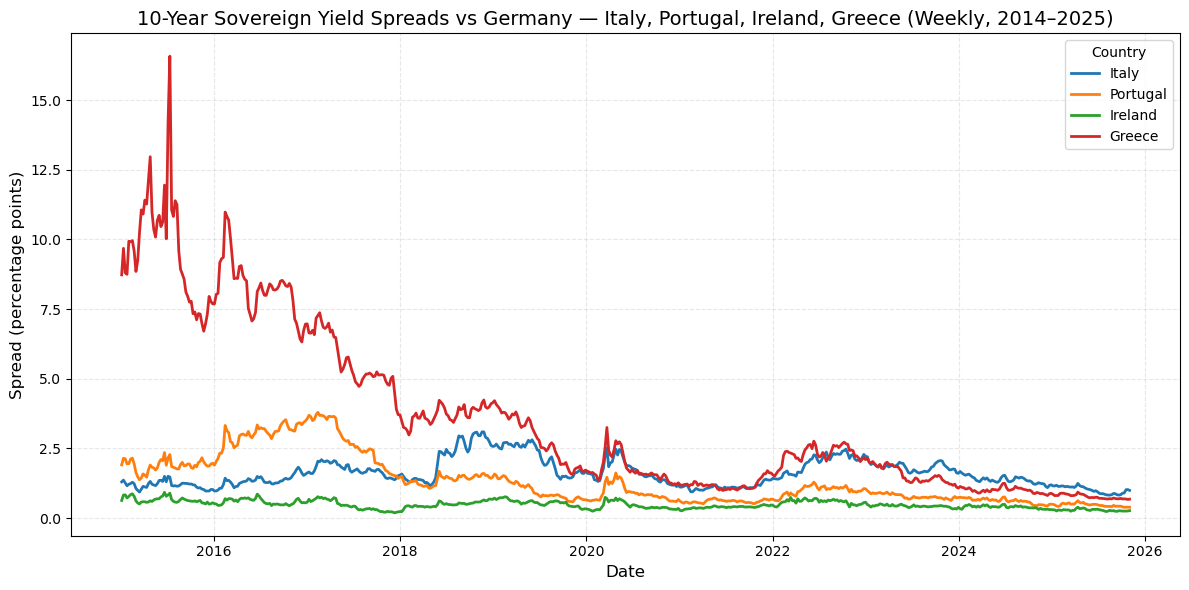

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# spreads to plot
periphery_spreads = ["Italy_spread", "Portugal_spread", "Ireland_spread", "Greece_spread"]

# keep only columns that exist (in case one wasn't computed yet)
periphery_spreads = [c for c in periphery_spreads if c in merged_ext.columns]

# weekly-average smoothing
smoothed_periphery = (
    merged_ext[["Date"] + periphery_spreads]
    .set_index("Date")
    .resample("W")  # weekly
    .mean()
)

# plot
plt.figure(figsize=(12, 6))
for col in periphery_spreads:
    plt.plot(smoothed_periphery.index, smoothed_periphery[col],
             label=col.replace("_spread", ""), linewidth=2)

plt.title("10-Year Sovereign Yield Spreads vs Germany — Italy, Portugal, Ireland, Greece (Weekly, 2014–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Spread (percentage points)", fontsize=12)
plt.legend(title="Country", fontsize=10)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


In [56]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_simple(x, maxlag=None):
    x = pd.Series(x).dropna()
    stat, pval, usedlag, nobs, crit, icbest = adfuller(
        x, regression="c", autolag="AIC" if maxlag is None else None, maxlag=maxlag
    )
    return {"stat": stat, "p": pval, "lags": usedlag, "nobs": nobs}

results = []
for c in [col for col in merged_ext.columns if col.endswith("_spread")]:
    s = merged_ext[c]
    ds = s.diff()
    results.append({
        "series": c,
        "ADF_level_p": adf_simple(s)["p"],
        "ADF_diff_p": adf_simple(ds)["p"],
    })

pd.DataFrame(results)



,series,ADF_level_p,ADF_diff_p
0,France_spread,0.249858,0.000000e+00
1,Belgium_spread,0.142572,2.084252e-30
2,Italy_spread,0.092537,0.000000e+00
3,Spain_spread,0.034933,0.000000e+00
4,Portugal_spread,0.640927,0.000000e+00
5,Ireland_spread,0.000574,0.000000e+00
6,Greece_spread,0.397652,0.000000e+00
